<a href="https://colab.research.google.com/github/JoelMuhanguzi/humanactivityclassifier/blob/main/Human_Activity_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DataSet Exploration**


*   This notebook is only working with accelerometer values x,y and z
*   To train with more data, a dataset containing gyroscope values is also required
*   Performance for both traditional ML and CNN models hardly differs to the nature of data




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Assuming your CSV file is named 'your_dataset.csv'
df = pd.read_csv('/content/TotalAcceleration.csv')

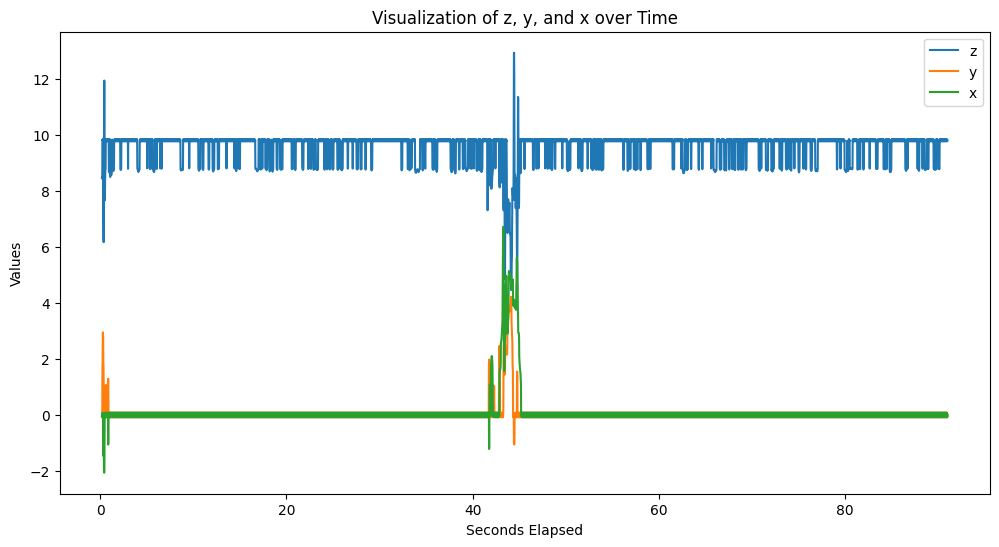

In [3]:
# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['seconds_elapsed'], df['z'], label='z')
plt.plot(df['seconds_elapsed'], df['y'], label='y')
plt.plot(df['seconds_elapsed'], df['x'], label='x')

# Add labels and title
plt.xlabel('Seconds Elapsed')
plt.ylabel('Values')
plt.title('Visualization of z, y, and x over Time')
plt.legend()

# Show the plot
plt.show()

**Load Multiple Datasets representing different Target Classes**

*   List item
*   List item



                  time  seconds_elapsed         z         y         x  \
0  1701893205883497200         0.180497  8.442791 -0.038246 -0.038246   
1  1701893205902291000         0.199291  8.528844  0.038246  0.038246   
2  1701893205921084400         0.218084  8.557528 -0.081273 -0.081273   
3  1701893205939877000         0.236877  9.800522  1.740190  0.000000   
4  1701893205958670300         0.255670  9.838768  1.940981  0.081273   

       target  
0  homesitted  
1  homesitted  
2  homesitted  
3  homesitted  
4  homesitted  


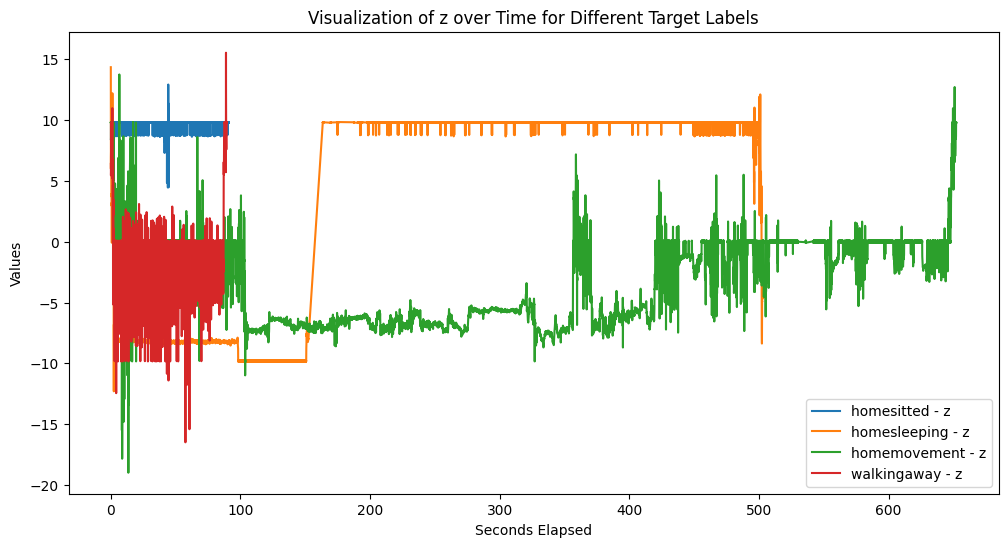

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first CSV file into a Pandas DataFrame
df1 = pd.read_csv('/content/dataset1.csv')
df1['target'] = 'homesitted'

# Load the second CSV file into a Pandas DataFrame
df2 = pd.read_csv('/content/dataset2.csv')
df2['target'] = 'homesleeping'

# Load the third CSV file into a Pandas DataFrame
df3 = pd.read_csv('/content/dataset3.csv')
df3['target'] = 'homemovement'

# Load the fourth CSV file into a Pandas DataFrame
df4 = pd.read_csv('/content/dataset4.csv')
df4['target'] = 'walkingaway'

# Combine the four DataFrames
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Display the updated DataFrame
print(combined_df.head())

# Plotting
plt.figure(figsize=(12, 6))

# Example: Plotting 'z' for each target label
for target_label in combined_df['target'].unique():
    target_data = combined_df[combined_df['target'] == target_label]
    plt.plot(target_data['seconds_elapsed'], target_data['z'], label=f'{target_label} - z')

# Add labels and title
plt.xlabel('Seconds Elapsed')
plt.ylabel('Values')
plt.title('Visualization of z over Time for Different Target Labels')
plt.legend()

# Show the plot
plt.show()


In [8]:
combined_df.head()

,time,seconds_elapsed,z,y,x,target
0,1701893205883497200,0.180497,8.442791,-0.038246,-0.038246,homesitted
1,1701893205902291000,0.199291,8.528844,0.038246,0.038246,homesitted
2,1701893205921084400,0.218084,8.557528,-0.081273,-0.081273,homesitted
3,1701893205939877000,0.236877,9.800522,1.740190,0.000000,homesitted
4,1701893205958670300,0.255670,9.838768,1.940981,0.081273,homesitted


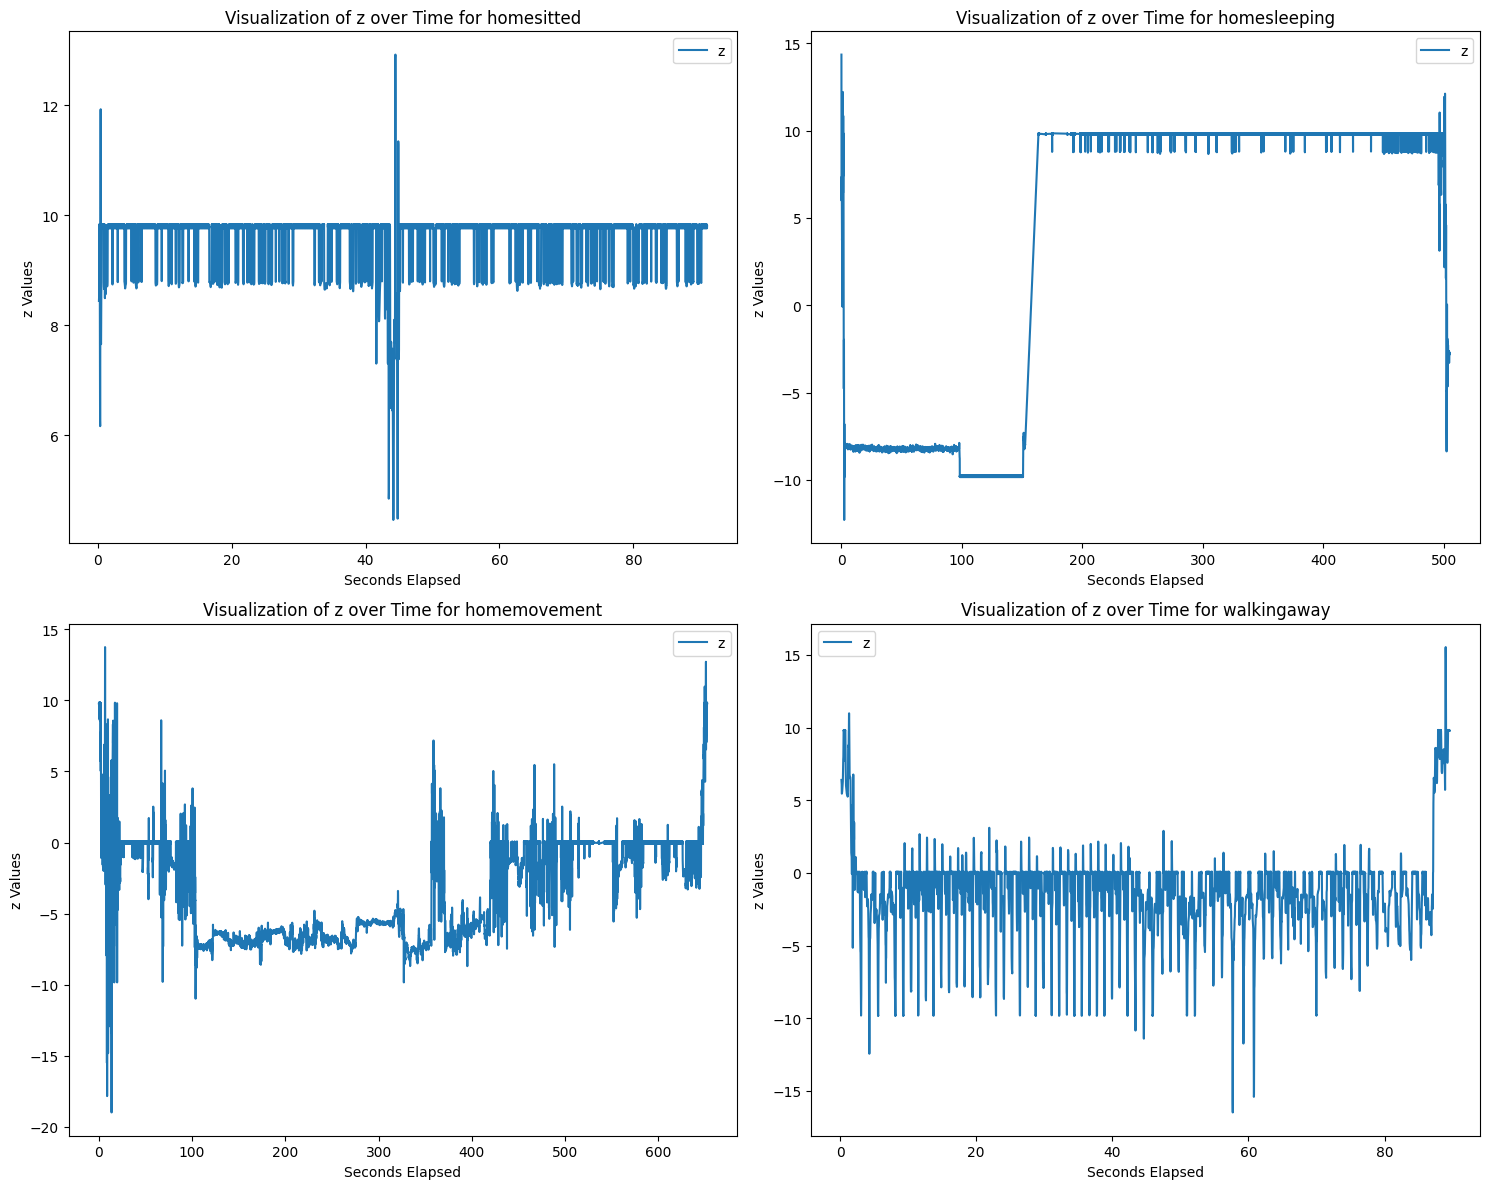

In [9]:

# Plotting individual plots for each target label
plt.figure(figsize=(15, 12))

for idx, target_label in enumerate(combined_df['target'].unique(), 1):
    plt.subplot(2, 2, idx)
    target_data = combined_df[combined_df['target'] == target_label]
    plt.plot(target_data['seconds_elapsed'], target_data['z'], label='z')
    plt.xlabel('Seconds Elapsed')
    plt.ylabel('z Values')
    plt.title(f'Visualization of z over Time for {target_label}')
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
# Export the combined DataFrame to a CSV file
combined_df.to_csv('combined_dataset.csv', index=False)

**Train a Decision Tree Classifier ML Model**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the combined CSV file into a Pandas DataFrame
combined_df = pd.read_csv('/content/combined_dataset.csv')

# Split the data into features (X) and target labels (y)
X = combined_df[['x', 'y', 'z']]
y = combined_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.89
              precision    recall  f1-score   support

homemovement       0.95      0.95      0.95      6913
  homesitted       0.71      0.21      0.32       966
homesleeping       0.86      0.98      0.92      4992
 walkingaway       0.66      0.66      0.66       984

    accuracy                           0.89     13855
   macro avg       0.79      0.70      0.71     13855
weighted avg       0.88      0.89      0.87     13855



In [12]:
import joblib

In [18]:
# Save the model to a file
joblib.dump(clf, 'model.joblib')

# Load the model from the file
loaded_model = joblib.load('model.joblib')

# Example: Passing values for x, y, and z to predict the target label
new_data = pd.DataFrame({'x': [0.5], 'y': [1.0], 'z': [1.0]})
predicted_label = loaded_model.predict(new_data)
print(f'Predicted Label: {predicted_label[0]}')

Predicted Label: walkingaway


**Train a CNN!**

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [22]:
# Encode the target labels using LabelEncoder
label_encoder = LabelEncoder()
combined_df['target_encoded'] = label_encoder.fit_transform(combined_df['target'])

# Split the data into features (X) and target labels (y)
X = combined_df[['x', 'y', 'z']]
y = combined_df['target_encoded']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a simple neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(3,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')  # Assuming you have 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = label_encoder.inverse_transform(y_pred.argmax(axis=1))
y_test_classes = label_encoder.inverse_transform(y_test)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test_classes, y_pred_classes))

Epoch 1/10
1732/1732 [==============================] - 10s 5ms/step - loss: 0.3991 - accuracy: 0.8572 - val_loss: 0.3391 - val_accuracy: 0.8683
Epoch 2/10
1732/1732 [==============================] - 4s 2ms/step - loss: 0.3365 - accuracy: 0.8644 - val_loss: 0.3203 - val_accuracy: 0.8702
Epoch 3/10
1732/1732 [==============================] - 6s 3ms/step - loss: 0.3183 - accuracy: 0.8688 - val_loss: 0.3107 - val_accuracy: 0.8735
Epoch 4/10
1732/1732 [==============================] - 4s 2ms/step - loss: 0.3057 - accuracy: 0.8720 - val_loss: 0.2971 - val_accuracy: 0.8751
Epoch 5/10
1732/1732 [==============================] - 4s 2ms/step - loss: 0.2973 - accuracy: 0.8750 - val_loss: 0.2910 - val_accuracy: 0.8792
Epoch 6/10
1732/1732 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.8768 - val_loss: 0.2895 - val_accuracy: 0.8817
Epoch 7/10
1732/1732 [==============================] - 4s 2ms/step - loss: 0.2889 - accuracy: 0.8771 - val_loss: 0.2864 - val_accuracy

In [23]:
# Save the model and scaler
model.save('model.h5')
joblib.dump(scaler, 'scaler.joblib')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['scaler.joblib']

In [28]:
# Reload the model and scaler
loaded_model = keras.models.load_model('model.h5')
loaded_scaler = joblib.load('scaler.joblib')

# Example: Perform inference on new data
new_data = pd.DataFrame({'x': [0.5], 'y': [0.1], 'z': [1.0]})
new_data_scaled = loaded_scaler.transform(new_data)
predicted_probabilities = loaded_model.predict(new_data_scaled)
predicted_class = label_encoder.inverse_transform(predicted_probabilities.argmax(axis=1))[0]

print(f'Predicted Class: {predicted_class}')

1/1 [==============================] - 0s 138ms/step
Predicted Class: walkingaway


In [29]:
# Save the model and scaler
model.save('model.keras')

In [31]:
# Reload the model and scaler
loaded_model = keras.models.load_model('model.keras')
loaded_scaler = joblib.load('scaler.joblib')

# Example: Perform inference on new data
new_data = pd.DataFrame({'x': [0.5], 'y': [0.2], 'z': [1.0]})
new_data_scaled = loaded_scaler.transform(new_data)
predicted_probabilities = loaded_model.predict(new_data_scaled)
predicted_class = label_encoder.inverse_transform(predicted_probabilities.argmax(axis=1))[0]

print(f'Predicted Class: {predicted_class}')

1/1 [==============================] - 0s 85ms/step
Predicted Class: walkingaway


In [40]:
# Print the probabilities for all classes
print('Probabilities:')
for i, prob in enumerate(predicted_probabilities[0]):
    print(f'Class {i}: {prob:.4f}')

Probabilities:
Class 0: 0.3778
Class 1: 0.0138
Class 2: 0.0061
Class 3: 0.6023


In [41]:
# Print the probabilities for all classes with their original labels
print('Probabilities:')
for original_class, prob in zip(label_encoder.classes_, predicted_probabilities[0]):
    print(f'{original_class}: {prob:.4f}')

Probabilities:
homemovement: 0.3778
homesitted: 0.0138
homesleeping: 0.0061
walkingaway: 0.6023


**Convert to TFlite Model, still experimental**

In [33]:
from tensorflow import lite

In [34]:
# Convert the Keras model to TFLite
converter = lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the optimized TFLite model to a file
with open('model_optimized.tflite', 'wb') as f:
    f.write(tflite_model)

In [35]:
import numpy as np